# Predicting the Sale Price of Bulldozers using Machine Learning

In this notebook, we're going to go through an example machine learning project with the goal of predicting the sale price of bulldozers.

## 1. Problem Defination:

How well can we predict the future sale price of a bulldozer, given its characteristics and previous examples of how much similar bulldozers have been sold for?

## 2. Data:

The data is downloaded from the Kaggle Bluebook for Bulldozers competition: https://www.kaggle.com/c/bluebook-for-bulldozers/data

There are 3 main datasets:
* Train.csv is the training set, which contains data through the end of 2011.
* Valid.csv is the validation set, which contains data from January 1, 2012 - April 30, 2012 You make predictions on this set throughout the majority of the competition. Your score on this set is used to create the public leaderboard.
* Test.csv is the test set, which won't be released until the last week of the competition. It contains data from May 1, 2012 - November 2012. Your score on the test set determines your final rank for the competition.

## 3. Evaluation:

The evaluation metric for this competition is the RMSLE (root mean squared log error) between the actual and predicted auction prices.

For more on the evaluation of this project check: https://www.kaggle.com/c/bluebook-for-bulldozers/overview/evaluation

Note: The goal for most regression evaluation metrics is to minimize the error. For example, our goal for this project will be to build a machine learning model which minimises RMSLE.

## 4. Features:

Kaggle provides a data dictionary detailing all of the features of the dataset. You can view this data dictionary on Google Sheets: https://docs.google.com/spreadsheets/d/18ly-bLR8sbDJLITkWG7ozKm8l3RyieQ2Fpgix-beSYI/edit?usp=sharing

## Importing modules and dataset

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [4]:
dataset = pd.read_csv("data/TrainAndValid.csv", low_memory=False, parse_dates=["saledate"])
dataset

,SalesID,SalePrice,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,saledate,...,Undercarriage_Pad_Width,Stick_Length,Thumb,Pattern_Changer,Grouser_Type,Backhoe_Mounting,Blade_Type,Travel_Controls,Differential_Type,Steering_Controls
0,1139246,66000.0,999089,3157,121,3.0,2004,68.0,Low,2006-11-16,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional
1,1139248,57000.0,117657,77,121,3.0,1996,4640.0,Low,2004-03-26,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional
2,1139249,10000.0,434808,7009,121,3.0,2001,2838.0,High,2004-02-26,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1139251,38500.0,1026470,332,121,3.0,2001,3486.0,High,2011-05-19,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1139253,11000.0,1057373,17311,121,3.0,2007,722.0,Medium,2009-07-23,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
412693,6333344,10000.0,1919201,21435,149,2.0,2005,NaN,NaN,2012-03-07,...,None or Unspecified,None or Unspecified,None or Unspecified,None or Unspecified,Double,NaN,NaN,NaN,NaN,NaN
412694,6333345,10500.0,1882122,21436,149,2.0,2005,NaN,NaN,2012-01-28,...,None or Unspecified,None or Unspecified,None or Unspecified,None or Unspecified,Double,NaN,NaN,NaN,NaN,NaN
412695,6333347,12500.0,1944213,21435,149,2.0,2005,NaN,NaN,2012-01-28,...,None or Unspecified,None or Unspecified,None or Unspecified,None or Unspecified,Double,NaN,NaN,NaN,NaN,NaN
412696,6333348,10000.0,1794518,21435,149,2.0,2006,NaN,NaN,2012-03-07,...,None or Unspecified,None or Unspecified,None or Unspecified,None or Unspecified,Double,NaN,NaN,NaN,NaN,NaN


In [5]:
dataset["saleYear"] = dataset.saledate.dt.year

In [6]:
dataset.dtypes

SalesID                              int64
SalePrice                          float64
MachineID                            int64
ModelID                              int64
datasource                           int64
auctioneerID                       float64
YearMade                             int64
MachineHoursCurrentMeter           float64
UsageBand                           object
saledate                    datetime64[ns]
fiModelDesc                         object
fiBaseModel                         object
fiSecondaryDesc                     object
fiModelSeries                       object
fiModelDescriptor                   object
ProductSize                         object
fiProductClassDesc                  object
state                               object
ProductGroup                        object
ProductGroupDesc                    object
Drive_System                        object
Enclosure                           object
Forks                               object
Pad_Type   

In [7]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 412698 entries, 0 to 412697
Data columns (total 54 columns):
 #   Column                    Non-Null Count   Dtype         
---  ------                    --------------   -----         
 0   SalesID                   412698 non-null  int64         
 1   SalePrice                 412698 non-null  float64       
 2   MachineID                 412698 non-null  int64         
 3   ModelID                   412698 non-null  int64         
 4   datasource                412698 non-null  int64         
 5   auctioneerID              392562 non-null  float64       
 6   YearMade                  412698 non-null  int64         
 7   MachineHoursCurrentMeter  147504 non-null  float64       
 8   UsageBand                 73670 non-null   object        
 9   saledate                  412698 non-null  datetime64[ns]
 10  fiModelDesc               412698 non-null  object        
 11  fiBaseModel               412698 non-null  object        
 12  fi

In [8]:
dataset.isna().sum()

SalesID                          0
SalePrice                        0
MachineID                        0
ModelID                          0
datasource                       0
auctioneerID                 20136
YearMade                         0
MachineHoursCurrentMeter    265194
UsageBand                   339028
saledate                         0
fiModelDesc                      0
fiBaseModel                      0
fiSecondaryDesc             140727
fiModelSeries               354031
fiModelDescriptor           337882
ProductSize                 216605
fiProductClassDesc               0
state                            0
ProductGroup                     0
ProductGroupDesc                 0
Drive_System                305611
Enclosure                      334
Forks                       214983
Pad_Type                    331602
Ride_Control                259970
Stick                       331602
Transmission                224691
Turbocharged                331602
Blade_Extension     

## Visualizing relation between saledate and SalePrice:

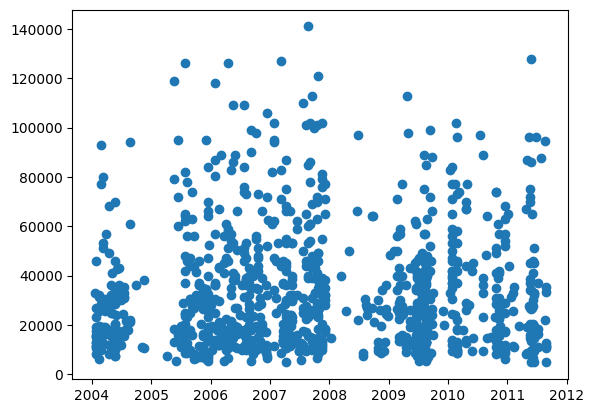

In [9]:
plt.scatter(dataset["saledate"][:1000], dataset["SalePrice"][:1000])

## Visualizing the relation between SalePrice and the frequency:

Text(0, 0.5, 'Frequency')

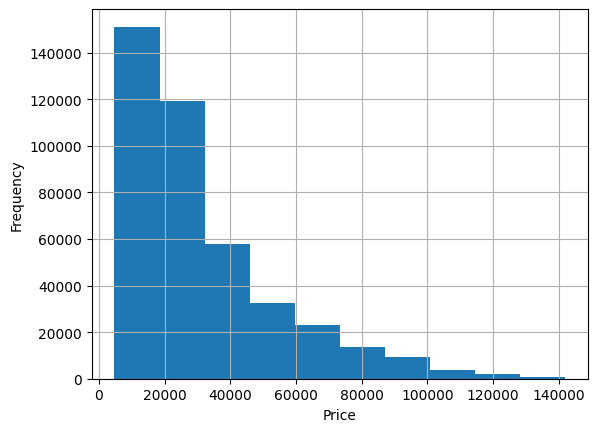

In [10]:
dataset.SalePrice.hist()
plt.xlabel("Price")
plt.ylabel("Frequency")

## Sorting the data in ascending order wrt to the saledate:

In [11]:
dataset.sort_values(by=["saledate"], inplace=True, ascending=True)
dataset

,SalesID,SalePrice,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,saledate,...,Stick_Length,Thumb,Pattern_Changer,Grouser_Type,Backhoe_Mounting,Blade_Type,Travel_Controls,Differential_Type,Steering_Controls,saleYear
205615,1646770,9500.0,1126363,8434,132,18.0,1974,NaN,NaN,1989-01-17,...,NaN,NaN,NaN,NaN,None or Unspecified,Straight,None or Unspecified,NaN,NaN,1989
274835,1821514,14000.0,1194089,10150,132,99.0,1980,NaN,NaN,1989-01-31,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional,1989
141296,1505138,50000.0,1473654,4139,132,99.0,1978,NaN,NaN,1989-01-31,...,NaN,NaN,NaN,NaN,None or Unspecified,Straight,None or Unspecified,NaN,NaN,1989
212552,1671174,16000.0,1327630,8591,132,99.0,1980,NaN,NaN,1989-01-31,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional,1989
62755,1329056,22000.0,1336053,4089,132,99.0,1984,NaN,NaN,1989-01-31,...,NaN,NaN,NaN,NaN,None or Unspecified,PAT,Lever,NaN,NaN,1989
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
410879,6302984,16000.0,1915521,5266,149,99.0,2001,NaN,NaN,2012-04-28,...,NaN,NaN,NaN,NaN,None or Unspecified,PAT,None or Unspecified,NaN,NaN,2012
412476,6324811,6000.0,1919104,19330,149,99.0,2004,NaN,NaN,2012-04-28,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2012
411927,6313029,16000.0,1918416,17244,149,99.0,2004,NaN,NaN,2012-04-28,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2012
407124,6266251,55000.0,509560,3357,149,99.0,1993,NaN,NaN,2012-04-28,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2012


## Making a copy of the dataset:

In [12]:
og_dataset = dataset.copy()

## Converting string data into categories: 

One way to help turn all of our data into numbers is to convert the columns with the string datatype into a category datatype.

To do this we can use the pandas types API which allows us to interact and manipulate the types of data.

In [13]:
dataset.head().T

,205615,274835,141296,212552,62755
SalesID,1646770,1821514,1505138,1671174,1329056
SalePrice,9500.0,14000.0,50000.0,16000.0,22000.0
MachineID,1126363,1194089,1473654,1327630,1336053
ModelID,8434,10150,4139,8591,4089
datasource,132,132,132,132,132
auctioneerID,18.0,99.0,99.0,99.0,99.0
YearMade,1974,1980,1978,1980,1984
MachineHoursCurrentMeter,NaN,NaN,NaN,NaN,NaN
UsageBand,NaN,NaN,NaN,NaN,NaN
saledate,1989-01-17 00:00:00,1989-01-31 00:00:00,1989-01-31 00:00:00,1989-01-31 00:00:00,1989-01-31 00:00:00


In [14]:
pd.api.types.is_string_dtype(dataset["UsageBand"])

False

In [15]:
# The following columns contain string:
for label, content in dataset.items():
    if pd.api.types.is_object_dtype(content):
        print(label)

UsageBand
fiModelDesc
fiBaseModel
fiSecondaryDesc
fiModelSeries
fiModelDescriptor
ProductSize
fiProductClassDesc
state
ProductGroup
ProductGroupDesc
Drive_System
Enclosure
Forks
Pad_Type
Ride_Control
Stick
Transmission
Turbocharged
Blade_Extension
Blade_Width
Enclosure_Type
Engine_Horsepower
Hydraulics
Pushblock
Ripper
Scarifier
Tip_Control
Tire_Size
Coupler
Coupler_System
Grouser_Tracks
Hydraulics_Flow
Track_Type
Undercarriage_Pad_Width
Stick_Length
Thumb
Pattern_Changer
Grouser_Type
Backhoe_Mounting
Blade_Type
Travel_Controls
Differential_Type
Steering_Controls


In [16]:
# Turning all strings in categories:
for label, content in dataset.items():
    if pd.api.types.is_object_dtype(content):
        dataset[label] = content.astype("category").cat.as_ordered()

In [17]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Index: 412698 entries, 205615 to 409203
Data columns (total 54 columns):
 #   Column                    Non-Null Count   Dtype         
---  ------                    --------------   -----         
 0   SalesID                   412698 non-null  int64         
 1   SalePrice                 412698 non-null  float64       
 2   MachineID                 412698 non-null  int64         
 3   ModelID                   412698 non-null  int64         
 4   datasource                412698 non-null  int64         
 5   auctioneerID              392562 non-null  float64       
 6   YearMade                  412698 non-null  int64         
 7   MachineHoursCurrentMeter  147504 non-null  float64       
 8   UsageBand                 73670 non-null   category      
 9   saledate                  412698 non-null  datetime64[ns]
 10  fiModelDesc               412698 non-null  category      
 11  fiBaseModel               412698 non-null  category      
 12  fi

## Filling null numerical values: 

In [18]:
# Check for numeric columns have null values:
for label, content in dataset.items():
    if pd.api.types.is_numeric_dtype(content):
        if pd.isnull(content).sum():
            print(label)

auctioneerID
MachineHoursCurrentMeter


In [19]:
# Filling these null values with median as median is better than mean in large datasets:
for label, content in dataset.items():
    if pd.api.types.is_numeric_dtype(content):
        if pd.isnull(content).sum():
            dataset[label] = content.fillna(content.median())

In [20]:
# Check for which numeric columns have null values:
for label, content in dataset.items():
    if pd.api.types.is_numeric_dtype(content):
        if pd.isnull(content).sum():
            print(label)

## Filling null/missing categorical values:

In [21]:
# Check for non-numeric columns have null values:
for label, content in dataset.items():
    if not pd.api.types.is_numeric_dtype(content):
        print(label)

UsageBand
saledate
fiModelDesc
fiBaseModel
fiSecondaryDesc
fiModelSeries
fiModelDescriptor
ProductSize
fiProductClassDesc
state
ProductGroup
ProductGroupDesc
Drive_System
Enclosure
Forks
Pad_Type
Ride_Control
Stick
Transmission
Turbocharged
Blade_Extension
Blade_Width
Enclosure_Type
Engine_Horsepower
Hydraulics
Pushblock
Ripper
Scarifier
Tip_Control
Tire_Size
Coupler
Coupler_System
Grouser_Tracks
Hydraulics_Flow
Track_Type
Undercarriage_Pad_Width
Stick_Length
Thumb
Pattern_Changer
Grouser_Type
Backhoe_Mounting
Blade_Type
Travel_Controls
Differential_Type
Steering_Controls


In [22]:
# Turn categorical variables into numbers and filling the missing values:
for label, content in dataset.items():
    if not pd.api.types.is_numeric_dtype(content):
        # Turn categories into numbers and add 1 cuz pd.Categorical() turns missing values into -1 which we dont want int the dataset
        dataset[label] = pd.Categorical(content).codes+1

In [43]:
dataset.columns

Index(['SalesID', 'SalePrice', 'MachineID', 'ModelID', 'datasource',
       'auctioneerID', 'YearMade', 'MachineHoursCurrentMeter', 'UsageBand',
       'saledate', 'fiModelDesc', 'fiBaseModel', 'fiSecondaryDesc',
       'fiModelSeries', 'fiModelDescriptor', 'ProductSize',
       'fiProductClassDesc', 'state', 'ProductGroup', 'ProductGroupDesc',
       'Drive_System', 'Enclosure', 'Forks', 'Pad_Type', 'Ride_Control',
       'Stick', 'Transmission', 'Turbocharged', 'Blade_Extension',
       'Blade_Width', 'Enclosure_Type', 'Engine_Horsepower', 'Hydraulics',
       'Pushblock', 'Ripper', 'Scarifier', 'Tip_Control', 'Tire_Size',
       'Coupler', 'Coupler_System', 'Grouser_Tracks', 'Hydraulics_Flow',
       'Track_Type', 'Undercarriage_Pad_Width', 'Stick_Length', 'Thumb',
       'Pattern_Changer', 'Grouser_Type', 'Backhoe_Mounting', 'Blade_Type',
       'Travel_Controls', 'Differential_Type', 'Steering_Controls',
       'saleYear'],
      dtype='object')

In [23]:
dataset.isna().sum()

SalesID                     0
SalePrice                   0
MachineID                   0
ModelID                     0
datasource                  0
auctioneerID                0
YearMade                    0
MachineHoursCurrentMeter    0
UsageBand                   0
saledate                    0
fiModelDesc                 0
fiBaseModel                 0
fiSecondaryDesc             0
fiModelSeries               0
fiModelDescriptor           0
ProductSize                 0
fiProductClassDesc          0
state                       0
ProductGroup                0
ProductGroupDesc            0
Drive_System                0
Enclosure                   0
Forks                       0
Pad_Type                    0
Ride_Control                0
Stick                       0
Transmission                0
Turbocharged                0
Blade_Extension             0
Blade_Width                 0
Enclosure_Type              0
Engine_Horsepower           0
Hydraulics                  0
Pushblock 

## Splitting, fitting the data into the model:

In [24]:
from sklearn.ensemble import RandomForestRegressor
import time

%time
model = RandomForestRegressor(n_jobs=-1, random_state=42)
model.fit(dataset.drop("SalePrice", axis=1), dataset["SalePrice"])

CPU times: user 1 μs, sys: 1e+03 ns, total: 2 μs
Wall time: 5.96 μs


RandomForestRegressor(n_jobs=-1, random_state=42)

In [25]:
model.score(dataset.drop("SalePrice", axis=1), dataset["SalePrice"])

0.9878089186890112

### The above accurarcy score cant be taken into consideration as the model should'nt be validated on the same dataset it is been trained on

## Hence splitting our dataset into training and validation set

In [26]:
dataset_train = dataset[dataset.saleYear != 2012]
dataset_validate = dataset[dataset.saleYear == 2012]

len(dataset_train), len(dataset_validate)

(401125, 11573)

In [27]:
temp_model = RandomForestRegressor(n_jobs=-1, random_state=42)
X_train = dataset_train.drop("SalePrice", axis=1)
y_train = dataset_train["SalePrice"]
temp_model.fit(X_train, y_train)

X_validate = dataset_validate.drop("SalePrice", axis=1)
y_validate = dataset_validate["SalePrice"]

In [28]:
temp_model.score(X_validate, y_validate)

0.8709388599952466

## Building our own evaluation matrix because the result needs to be evaluated on RMSLE (root mean squared log error):

In [29]:
from sklearn.metrics import mean_squared_log_error, mean_absolute_percentage_error, r2_score

def rmsle(y_test, y_preds):
    """
    Calculates root mean squared log error between predictions and true labels
    """
    return np.sqrt(mean_squared_log_error(y_test, y_preds))

def show_scores(model):
    train_preds = model.predict(X_train)
    val_preds = model.predict(X_validate)

    scores = {"Training MAE": mean_absolute_percentage_error(y_train, train_preds),
          "Valid MAE":  mean_absolute_percentage_error(y_validate, val_preds),
          "Training RMSLE": rmsle(y_train, train_preds),
          "Valid RMSLE": rmsle(y_validate, val_preds),
          "Training R^2": r2_score(y_train, train_preds),
          "Valid R^2": r2_score(y_validate, val_preds)}
    return scores

## Testing our model on a subset (to tune the hyper-parameters):

In [30]:
temp_model = RandomForestRegressor(n_jobs=-1, random_state=42, max_samples=10000)

In [31]:
%time
temp_model.fit(X_train, y_train)

CPU times: user 2 μs, sys: 1 μs, total: 3 μs
Wall time: 184 μs


RandomForestRegressor(max_samples=10000, n_jobs=-1, random_state=42)

In [32]:
show_scores(temp_model)

{'Training MAE': 0.20218162510458856,
 'Valid MAE': 0.2405768503276217,
 'Training RMSLE': 0.25100929441210257,
 'Valid RMSLE': 0.2900364027933527,
 'Training R^2': 0.8688465168746909,
 'Valid R^2': 0.8363949692730683}

## Hyper-parameter tuning with RandomSearchCV

In [33]:
%time
from sklearn.model_selection import RandomizedSearchCV

rf_grid = {
    "n_estimators": np.arange(10,100,10),
    "max_depth": [None, 3, 5, 10],
    "min_samples_split": np.arange(2, 20, 2),
    "min_samples_leaf": np.arange(1, 20, 2),
    "max_features": [0.5, 1, "sqrt", "auto"],
    "max_samples": [10000]
}

temp_model = RandomizedSearchCV(RandomForestRegressor(n_jobs=-1, random_state=42), param_distributions=rf_grid, n_iter=5, cv=5, verbose=2)
temp_model.fit(X_train, y_train)

CPU times: user 1e+03 ns, sys: 0 ns, total: 1e+03 ns
Wall time: 2.62 μs
Fitting 5 folds for each of 5 candidates, totalling 25 fits
[CV] END max_depth=5, max_features=0.5, max_samples=10000, min_samples_leaf=9, min_samples_split=6, n_estimators=80; total time=   0.5s
[CV] END max_depth=5, max_features=0.5, max_samples=10000, min_samples_leaf=9, min_samples_split=6, n_estimators=80; total time=   0.5s
[CV] END max_depth=5, max_features=0.5, max_samples=10000, min_samples_leaf=9, min_samples_split=6, n_estimators=80; total time=   0.5s
[CV] END max_depth=5, max_features=0.5, max_samples=10000, min_samples_leaf=9, min_samples_split=6, n_estimators=80; total time=   0.5s
[CV] END max_depth=5, max_features=0.5, max_samples=10000, min_samples_leaf=9, min_samples_split=6, n_estimators=80; total time=   0.5s
[CV] END max_depth=5, max_features=auto, max_samples=10000, min_samples_leaf=19, min_samples_split=18, n_estimators=60; total time=   0.0s
[CV] END max_depth=5, max_features=auto, max_samp

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/model_selection/_validation.py:540: FitFailedWarning: 
5 fits failed out of a total of 25.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
5 fits failed with the following error:
Traceback (most recent call last):
  File "/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/model_selection/_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/base.py", line 1466, in wrapper
    estimator._validate_params()
  File "/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/sit

RandomizedSearchCV(cv=5,
                   estimator=RandomForestRegressor(n_jobs=-1, random_state=42),
                   n_iter=5,
                   param_distributions={'max_depth': [None, 3, 5, 10],
                                        'max_features': [0.5, 1, 'sqrt',
                                                         'auto'],
                                        'max_samples': [10000],
                                        'min_samples_leaf': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19]),
                                        'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18]),
                                        'n_estimators': array([10, 20, 30, 40, 50, 60, 70, 80, 90])},
                   verbose=2)

In [34]:
temp_model.best_params_

{'n_estimators': 90,
 'min_samples_split': 6,
 'min_samples_leaf': 3,
 'max_samples': 10000,
 'max_features': 'sqrt',
 'max_depth': 10}

### Training the model with the best parameters:

In [35]:
rs_model = RandomForestRegressor(n_jobs=-1, random_state=42, n_estimators=90, min_samples_split=14, min_samples_leaf=1, max_features=0.5)

rs_model.fit(X_train, y_train)

RandomForestRegressor(max_features=0.5, min_samples_split=14, n_estimators=90,
                      n_jobs=-1, random_state=42)

In [36]:
# Model tested on 10000 data values
show_scores(temp_model)

{'Training MAE': 0.3422991962188422,
 'Valid MAE': 0.36572157032284014,
 'Training RMSLE': 0.373541384928519,
 'Valid RMSLE': 0.3957382307243255,
 'Training R^2': 0.7103210139611247,
 'Valid R^2': 0.7043864138502336}

In [37]:
# Tuned model
show_scores(rs_model)

{'Training MAE': 0.10794832709925994,
 'Valid MAE': 0.19299693305516916,
 'Training RMSLE': 0.14396417967671565,
 'Valid RMSLE': 0.24243507172852383,
 'Training R^2': 0.9596297026277109,
 'Valid R^2': 0.8828847392209797}

## Making predicitions on the test.csv data

In [54]:
test_dataset = pd.read_csv("data/Test.csv", low_memory=False, parse_dates=['saledate'])
test_dataset

,SalesID,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,saledate,fiModelDesc,...,Undercarriage_Pad_Width,Stick_Length,Thumb,Pattern_Changer,Grouser_Type,Backhoe_Mounting,Blade_Type,Travel_Controls,Differential_Type,Steering_Controls
0,1227829,1006309,3168,121,3,1999,3688.0,Low,2012-05-03,580G,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1227844,1022817,7271,121,3,1000,28555.0,High,2012-05-10,936,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional
2,1227847,1031560,22805,121,3,2004,6038.0,Medium,2012-05-10,EC210BLC,...,None or Unspecified,"9' 6""",Manual,None or Unspecified,Double,NaN,NaN,NaN,NaN,NaN
3,1227848,56204,1269,121,3,2006,8940.0,High,2012-05-10,330CL,...,None or Unspecified,None or Unspecified,Manual,Yes,Triple,NaN,NaN,NaN,NaN,NaN
4,1227863,1053887,22312,121,3,2005,2286.0,Low,2012-05-10,650K,...,NaN,NaN,NaN,NaN,NaN,None or Unspecified,PAT,None or Unspecified,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12452,6643171,2558317,21450,149,2,2008,NaN,NaN,2012-10-24,80NX3,...,None or Unspecified,None or Unspecified,None or Unspecified,None or Unspecified,Double,NaN,NaN,NaN,NaN,NaN
12453,6643173,2558332,21434,149,2,2005,NaN,NaN,2012-10-24,28N,...,None or Unspecified,None or Unspecified,None or Unspecified,None or Unspecified,Double,NaN,NaN,NaN,NaN,NaN
12454,6643184,2558342,21437,149,2,1000,NaN,NaN,2012-10-24,35N,...,None or Unspecified,None or Unspecified,None or Unspecified,None or Unspecified,Double,NaN,NaN,NaN,NaN,NaN
12455,6643186,2558343,21437,149,2,2006,NaN,NaN,2012-10-24,35N,...,None or Unspecified,None or Unspecified,None or Unspecified,None or Unspecified,Double,NaN,NaN,NaN,NaN,NaN


In [55]:
def pre_process_data(data):

    data["saleYear"] = data.saledate.dt.year
    #data.drop("saledate", axis=1, inplace=True)

    for label, content in data.items():
        if pd.api.types.is_numeric_dtype(content):
            if pd.isnull(content).sum():
                data[label] = content.fillna(content.median())

    for label, content in data.items():
        if not pd.api.types.is_numeric_dtype(content):
            # Turn categories into numbers and add 1 cuz pd.Categorical() turns missing values into -1 which we dont want int the dataset
            data[label] = pd.Categorical(content).codes+1
    return data

In [56]:
test_dataset = pre_process_data(test_dataset)
test_dataset.columns

Index(['SalesID', 'MachineID', 'ModelID', 'datasource', 'auctioneerID',
       'YearMade', 'MachineHoursCurrentMeter', 'UsageBand', 'saledate',
       'fiModelDesc', 'fiBaseModel', 'fiSecondaryDesc', 'fiModelSeries',
       'fiModelDescriptor', 'ProductSize', 'fiProductClassDesc', 'state',
       'ProductGroup', 'ProductGroupDesc', 'Drive_System', 'Enclosure',
       'Forks', 'Pad_Type', 'Ride_Control', 'Stick', 'Transmission',
       'Turbocharged', 'Blade_Extension', 'Blade_Width', 'Enclosure_Type',
       'Engine_Horsepower', 'Hydraulics', 'Pushblock', 'Ripper', 'Scarifier',
       'Tip_Control', 'Tire_Size', 'Coupler', 'Coupler_System',
       'Grouser_Tracks', 'Hydraulics_Flow', 'Track_Type',
       'Undercarriage_Pad_Width', 'Stick_Length', 'Thumb', 'Pattern_Changer',
       'Grouser_Type', 'Backhoe_Mounting', 'Blade_Type', 'Travel_Controls',
       'Differential_Type', 'Steering_Controls', 'saleYear'],
      dtype='object')

In [57]:
test_preds = rs_model.predict(test_dataset)

# Formating predictions into what kaggle wants

In [58]:
df_preds = pd.DataFrame()
df_preds["SalesId"] = test_dataset["SalesID"]
df_preds["SalesPrice"] = test_preds

df_preds

,SalesId,SalesPrice
0,1227829,26448.209953
1,1227844,22152.685365
2,1227847,74847.124375
3,1227848,69880.643198
4,1227863,70165.406181
...,...,...
12452,6643171,46855.297551
12453,6643173,19114.857900
12454,6643184,17608.138426
12455,6643186,21877.741527


# Exporting the predicted data as csv file

In [ ]:
df_preds.to_csv("data/preds.csv", index=FalseS)

# Feature Importance

In [59]:
rs_model.feature_importances_

array([3.07050239e-02, 2.10362541e-02, 4.70364316e-02, 1.26214206e-03,
       3.55819797e-03, 1.92401894e-01, 3.20606025e-03, 1.24699747e-03,
       6.60963712e-02, 4.56096427e-02, 3.96467863e-02, 7.19494607e-02,
       5.65482247e-03, 3.41099186e-02, 1.45439817e-01, 5.22345599e-02,
       6.66699095e-03, 4.92202905e-03, 6.97057081e-03, 3.22096434e-03,
       8.03812815e-02, 1.63266114e-03, 9.68981465e-04, 2.12157756e-03,
       2.50436546e-04, 1.55820897e-03, 3.47410865e-05, 4.17257260e-03,
       7.76852707e-03, 1.42060676e-03, 1.06928267e-03, 7.80178986e-03,
       2.15096242e-03, 6.83003221e-03, 2.15196970e-03, 2.14021163e-03,
       1.59817964e-02, 1.53428619e-03, 2.23034466e-02, 4.29986872e-03,
       9.42260404e-03, 2.16982818e-03, 1.10846320e-03, 2.49334033e-03,
       6.35209375e-04, 7.86115608e-04, 4.62453960e-04, 8.66464521e-04,
       4.44882323e-03, 1.19775840e-03, 3.35308645e-04, 5.19051023e-04,
       2.60064032e-02])

In [83]:
# Visualizing the top 20 important features

def plot_features(columns, importances, n=20):
    df = (pd.DataFrame({"features":columns,"feature_importance":importances}).sort_values("feature_importance",ascending=False).reset_index(drop=True))

    # Plot Importance

    fig,ax = plt.subplots()
    ax.barh(df["features"][:n], df["feature_importance"][:20], color="hotpink")
    ax.set_ylabel("Features", fontsize=14)
    ax.set_xlabel("Importance", fontsize=14)
    ax.invert_yaxis()

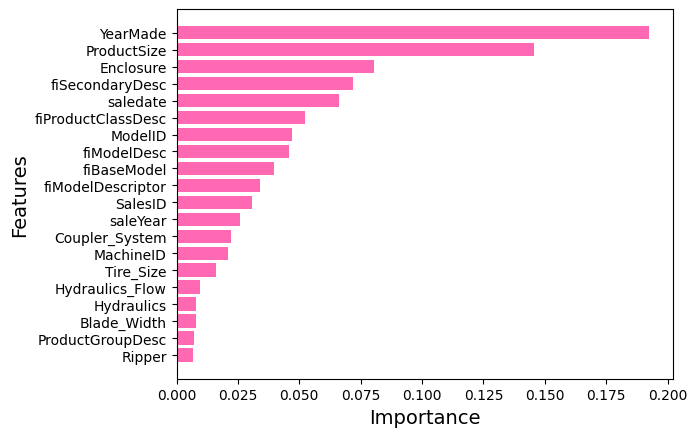

In [84]:
plot_features(X_train.columns, rs_model.feature_importances_)